In [1]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

pop_df = pd.read_parquet('aodsim_popularity_data.parquet')
pop_df.head(None)


,dataset_name,tot_size,avg_file_size,avg_event_size,pag,campaign,generator,num_replicas,fract_replicas,num_accesses
0,/ADDGravToGG_MS-10000_NED-2_KK-1_M-1000To2000_...,30723871806,1536193590,307239,EXO,RunII-Summer16,sherpa,"{'190101': 0, '190102': 0, '190103': 0, '19010...","{'190101': 0.0, '190102': 0.0, '190103': 0.0, ...","{'190101': 0, '190102': 0, '190103': 0, '19010..."
1,/ADDGravToGG_MS-10000_NED-2_KK-1_M-2000To4000_...,31331730690,1305488779,313324,EXO,RunII-Summer16,sherpa,"{'190101': 0, '190102': 0, '190103': 0, '19010...","{'190101': 0.0, '190102': 0.0, '190103': 0.0, ...","{'190101': 0, '190102': 0, '190103': 0, '19010..."
2,/ADDGravToGG_MS-10000_NED-2_KK-1_M-4000To10000...,31791123788,993472618,318567,EXO,RunII-Summer16,sherpa,"{'190101': 0, '190102': 0, '190103': 0, '19010...","{'190101': 0.0, '190102': 0.0, '190103': 0.0, ...","{'190101': 0, '190102': 0, '190103': 0, '19010..."
3,/ADDGravToGG_MS-10000_NED-4_KK-1_M-1000To2000_...,30731716765,3073171676,307320,EXO,RunII-Summer16,sherpa,"{'190101': 0, '190102': 0, '190103': 0, '19010...","{'190101': 0.0, '190102': 0.0, '190103': 0.0, ...","{'190101': 0, '190102': 0, '190103': 0, '19010..."
4,/ADDGravToGG_MS-10000_NED-4_KK-1_M-4000To10000...,31663182612,1666483295,317311,EXO,RunII-Summer16,sherpa,"{'190101': 0, '190102': 0, '190103': 0, '19010...","{'190101': 0.0, '190102': 0.0, '190103': 0.0, ...","{'190101': 0, '190102': 0, '190103': 0, '19010..."
...,...,...,...,...,...,...,...,...,...,...
29307,/ttZJets_TuneCP5_13TeV_madgraphMLM_pythia8/Run...,10311333961701,7396939714,452790,HIG,RunII-Autumn18,madgraph,"{'190101': 110, '190102': 118, '190103': 128, ...","{'190101': 1.350301907123095, '190102': 1.4625...","{'190101': 1, '190102': 1, '190103': 1, '19010..."
29308,/ttbb_4FS_13TeV_NNPDF30_sherpa-OpenLoops/RunII...,4847682918597,5280700347,455899,HIG,RunII-Fall17,sherpa,"{'190101': 0, '190102': 0, '190103': 0, '19010...","{'190101': 0.0, '190102': 0.0, '190103': 0.0, ...","{'190101': 0, '190102': 0, '190103': 0, '19010..."
29309,/ttbb_4FS_OpenLoops_13TeV-sherpa/RunIISummer16...,6935778096986,2892317805,351656,HIG,RunII-Summer16,sherpa,"{'190101': 0, '190102': 0, '190103': 0, '19010...","{'190101': 0.0, '190102': 0.0, '190103': 0.0, ...","{'190101': 0, '190102': 0, '190103': 0, '19010..."
29310,/ttbb_4FS_ckm_NNPDF31_TuneCP5_amcatnlo_madspin...,5375153267193,7486285887,451163,HIG,RunII-Autumn18,mcatnlo,"{'190101': 34, '190102': 34, '190103': 36, '19...","{'190101': 0.36641202555541613, '190102': 0.36...","{'190101': 0, '190102': 0, '190103': 1, '19010..."


In [2]:
from cmSim import utils

features = ['num_replicas', 'fract_replicas', 'num_accesses']
date_range = pd.date_range(start='2019-01-01', end='2020-10-31', freq='D')
days = [utils.get_string_from_date(dt.date()) for dt in date_range]
day_to_month = utils.get_day_to_month(days)
months = sorted(list(set(day_to_month.values())))
month_to_days = {month: [day for day in day_to_month
                         if month == day_to_month[day]]
                 for month in months}

for month in months:
    for feature in features:
        days = month_to_days[month]
        pop_df[f'{feature}_{month}'] = pop_df[feature].apply(
            lambda dict: int(sum(dict[day] for day in days)))

pop_df.drop(columns=features, inplace=True)


In [3]:
import numpy as np
import pylab as plt

histogram = np.empty(len(pop_df))
for i, row in pop_df.iterrows():
    histogram[i] = np.mean([row[f'num_accesses_{month}'] for month in months
                            if row[f'num_replicas_{month}'] > 0])


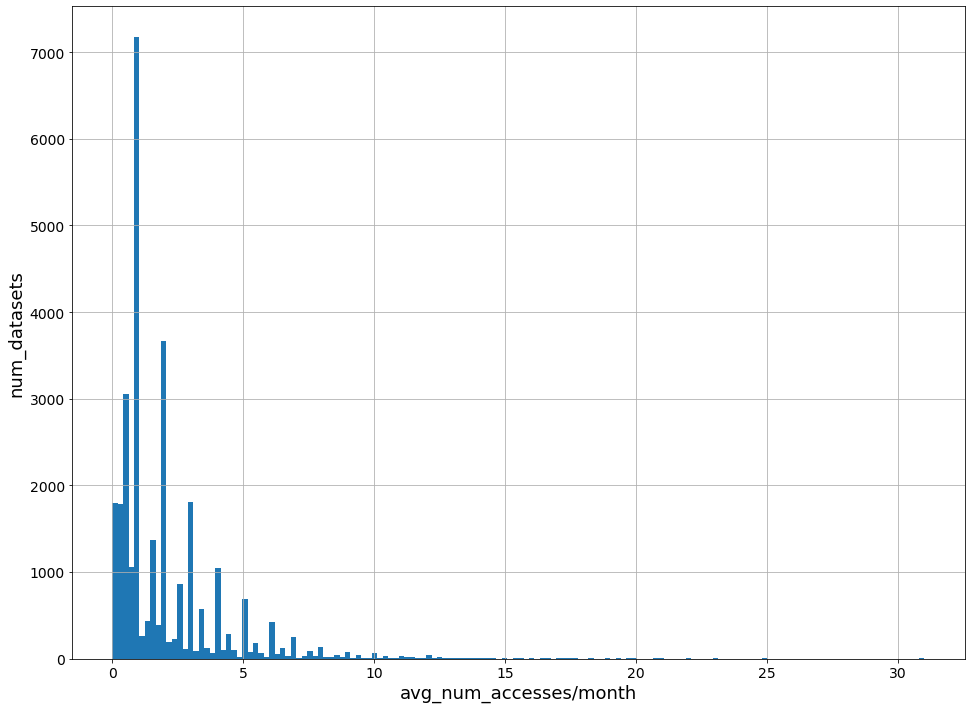

In [4]:
fig, ax = plt.subplots(figsize=(16, 12))

ax.hist(histogram, bins=150)
ax.set_xlabel('avg_num_accesses/month', fontsize=18)
ax.set_ylabel('num_datasets', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=14)
fig.set_facecolor('white')

plt.grid('dotted')

plt.show()


In [5]:
from sklearn.cluster import KMeans


def kmeans_1D_clustering(seq, num, log_transform=False):
    xs = np.array(seq)
    if log_transform:
        xs = np.log(xs + 1)
    kmeans = KMeans(n_clusters=num).fit(xs.reshape(-1, 1))
    labels = kmeans.labels_
    thresholds = [xs[np.where(labels == lab)[0]].max()
                  for lab in range(num)]
    thresholds = np.array(thresholds)
    if log_transform:
        thresholds = np.exp(thresholds) - 1
    thresholds = np.sort(thresholds)[:-1]
    return thresholds


thresholds = kmeans_1D_clustering(seq=histogram, num=2)


In [6]:
def assign_pop_class(dataset, month, threshold):
    if dataset[f'num_replicas_{month}'] > 0:
        return 'popular' if dataset[f'num_accesses_{month}'] > threshold else 'not_popular'
    else:
        return 'None'


for month in months:
    pop_df[f'pop_class_{month}'] = pop_df.apply(
        lambda dataset: assign_pop_class(dataset, month=month, threshold=thresholds[0]), axis=1)


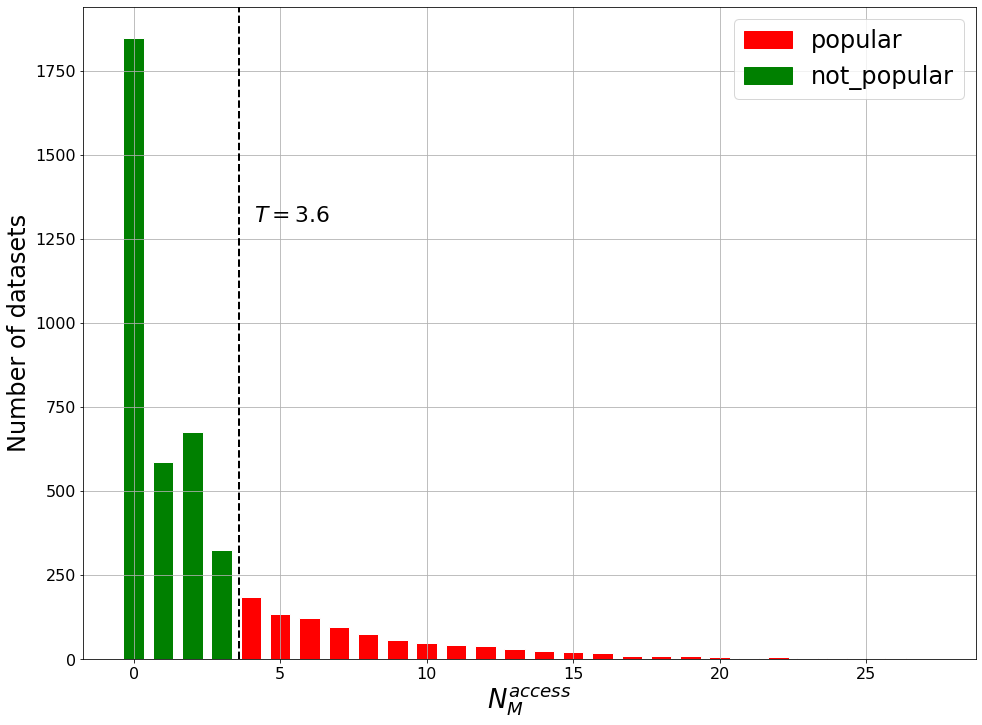

In [7]:
from matplotlib.patches import Patch

label_to_color = {'popular': 'red',
                  'not_popular': 'green'}

month = months[0]
pop_df_month = pop_df[pop_df[f'num_replicas_{month}'] > 0]
x = pop_df_month[f'num_accesses_{month}']

fig, ax = plt.subplots(figsize=(16, 12))
bins = np.arange(0, x.max() + 1.5) - 0.5
_, bins, patches = ax.hist(x, bins, histtype='bar', rwidth=0.7, ec='white')

bin_to_color = {}
for i, val in enumerate(bins[1:]):
    if val > thresholds[0]:
        bin_to_color[i] = label_to_color['popular']
    else:
        bin_to_color[i] = label_to_color['not_popular']
for i in bin_to_color:
    patches[i].set_facecolor(bin_to_color[i])

ax.axvline(thresholds[0], color='black', linestyle='dashed', linewidth=2)
ax.set_xlabel('$N^{access}_M$', fontsize=26)
ax.set_ylabel('Number of datasets', fontsize=24)
ax.text(thresholds[0] + 0.5, 1300, f'$T = {thresholds[0]}$', fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=16)
patches_list = [Patch(color=label_to_color[lab], label=lab)
                for lab in label_to_color]
plt.legend(handles=patches_list, fontsize=24)
fig.set_facecolor('white')
plt.grid('dotted')

plt.show()


In [8]:
import itertools


def get_features_importance(model, features):
    importances = model.feature_importances_
    col_to_impo = {f: i for f, i in zip(features, importances)}
    feat_to_impo = {feat: np.sum([col_to_impo[k] for k in group])
                    for feat, group in itertools.groupby(col_to_impo, lambda string: string.split('=')[0])}
    return feat_to_impo


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

metric_to_func = {'accuracy': accuracy_score,
                  'precision': precision_score,
                  'recall': recall_score}

performance = {'accuracy': {},
               'precision': {'popular': {}, 'not_popular': {}},
               'recall': {'popular': {}, 'not_popular': {}}}

features_importance = {month: {} for month in months}
pag_to_fi = {month: {} for month in months}

for month in months:
    dframe = pop_df[pop_df[f'num_replicas_{month}'] > 0]
    features = ['tot_size', 'avg_file_size', 'avg_event_size',
                'pag', 'campaign', 'generator',
                f'num_replicas_{month}', f'fract_replicas_{month}']
    target = f'pop_class_{month}'
    df = dframe[features]
    df.rename(columns={f'num_replicas_{month}': 'num_replicas',
                       f'fract_replicas_{month}': 'fract_replicas'},
              inplace=True)
    X = pd.get_dummies(df, prefix_sep='=')
    y = dframe[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)
    data = {'X': {'train': X_train, 'test': X_test},
            'y': {'train': y_train, 'test': y_test}}
    rf_classifier = RandomForestClassifier(n_estimators=10, max_depth=20)
    rf_classifier = rf_classifier.fit(data['X']['train'], data['y']['train'])

    features_importance[month] = get_features_importance(model=rf_classifier,
                                                         features=X.columns)
    pags = utils.get_pags()
    columns = list(X.columns)
    fi = rf_classifier.feature_importances_
    pag_to_fi[month] = {pag: fi[columns.index(f'pag={pag}')]
                        for pag in pags}

    y_pred = {}
    for set in ['train', 'test']:
        y_pred[set] = rf_classifier.predict(data['X'][set])
        for metric in performance:
            if metric == 'accuracy':
                m = metric_to_func['accuracy'](y_pred[set], data['y'][set])
                performance['accuracy'].setdefault(set, []).append(m)
            else:
                for label in ['popular', 'not_popular']:
                    m = metric_to_func[metric](y_pred[set], data['y'][set],
                                               pos_label=label)
                    performance[metric][label].setdefault(set, []).append(m)


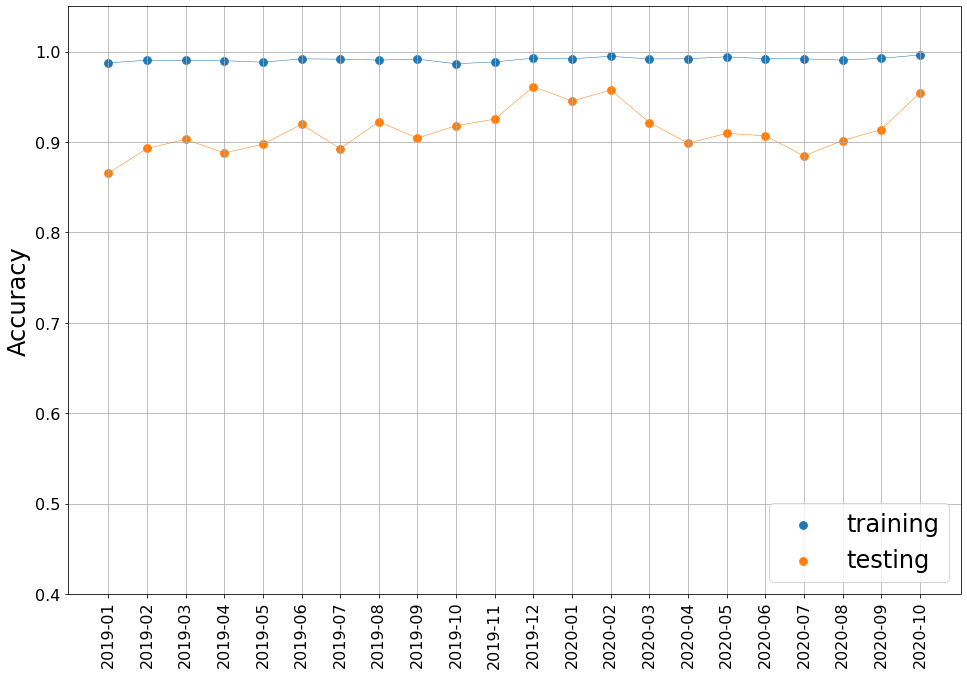

In [10]:
fig, ax = plt.subplots(figsize=(16, 12))
ax.scatter(months, performance['accuracy']['train'], label='training', s=60)
ax.scatter(months, performance['accuracy']['test'], label='testing', s=60)
ax.plot(performance['accuracy']['train'], linewidth=0.5)
ax.plot(performance['accuracy']['test'], linewidth=0.5)
ax.set_xticks(list(range(len(months))), labels=months)
ax.set_ylabel('Accuracy', fontsize=24)
ax.set_ylim(bottom=0.4, top=1.05)
ax.tick_params(axis='both', which='both', labelsize=16)
ax.legend(fontsize=24, loc='lower right')
ax.grid('dotted')
fig.autofmt_xdate(rotation=90, ha='center')
fig.set_facecolor('white')

plt.show()
